# Machine Learning Fundamentals - Lecture 01

This is the Jupyter notebook for Lecture 01 of the Machine Learning Fundamentals
course.

## Class workout

In [146]:
# Import the required libraries using the commonly use short names (pd, sns, ...)
import pandas as pd
import seaborn as sns

# Set a nicer style for Seaborn plots
sns.set_style("darkgrid")

In [147]:
# Load the dataset
df = pd.read_csv("Pokemon.csv")

# Let's take a look at the top rows in the table
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [148]:
# Let's get some information about the columns in this table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [149]:
# See standard descriptive statistics about each column
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [150]:
# It's not good practice to have column names with spaces and other non-standard
# characters, so let's fix this by renaming the columns to standard names
df.rename(columns={
    "Type 1" : "Type1",
    "Type 2" : "Type2",
    "Sp. Atk" : "SpAtk",
    "Sp. Def" : "SpDef",
}, inplace=True)

df.head()

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [151]:
# Do we have missing values in any of the columns?
na_counts = df.isna().sum()

na_counts

#               0
Name            0
Type1           0
Type2         386
Total           0
HP              0
Attack          0
Defense         0
SpAtk           0
SpDef           0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [152]:
# We seem to have missing values in the "Type2" column; let's replace them with
# the string "None"
df["Type2"] = df["Type2"].fillna("None")

In [153]:
# Since primary and secondary types are essentially categories (and not just
# strings / objects), we can convert these columns to the category type
df["Type1"] = df["Type1"].astype("category")
df["Type2"] = df["Type2"].astype("category")

# Let's look at the column information now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        800 non-null    object  
 2   Type1       800 non-null    category
 3   Type2       800 non-null    category
 4   Total       800 non-null    int64   
 5   HP          800 non-null    int64   
 6   Attack      800 non-null    int64   
 7   Defense     800 non-null    int64   
 8   SpAtk       800 non-null    int64   
 9   SpDef       800 non-null    int64   
 10  Speed       800 non-null    int64   
 11  Generation  800 non-null    int64   
 12  Legendary   800 non-null    bool    
dtypes: bool(1), category(2), int64(9), object(1)
memory usage: 66.3+ KB


In [154]:
# Quick look at which categories exist in primary and secondary types
print("== Primary type categories ==")
display(list(df["Type1"].cat.categories))
print("== Secondary type categories ==")
display(list(df["Type2"].cat.categories))

== Primary type categories ==


['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

== Secondary type categories ==


['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'None',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

In [155]:
# How many different Pokémons do we have by generation?

# We can obtain this information by grouping the data frame by the "Generation"
# column and then count how many items there are in each generation
print("== Using groupby ==")
display(df.groupby(["Generation"])["#"].count())

# Another approach is just to take the "Generation" column directly, count how
# many different values there are, and sort by index (the index being "Generation")
print("== Using the 'Generation' column directly ==")
display(df["Generation"].value_counts().sort_index())

== Using groupby ==


Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: #, dtype: int64

== Using the 'Generation' column directly ==


Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: count, dtype: int64

In [156]:
# How many Pokémons in each primary category?
# Note that we're not sorting here, leaving the natural sort by count
# If we did sort by index, the sort would be done alphabetically by Type1
df["Type1"].value_counts()

Type1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [157]:
# Show the mean stats (HP, Attack, etc) for each primary type set of Pokémons
# Round to 1 decimal place and sort by "Total" from largest to smallest
df.groupby("Type1", observed=False)[
    ["Total", "HP", "Attack", "Defense", "SpAtk", "SpDef", "Speed"]
].mean().round(1).sort_values("Total", ascending=False)

,Total,HP,Attack,Defense,SpAtk,SpDef,Speed
Type1,,,,,,,
Dragon,550.5,83.3,112.1,86.4,96.8,88.8,83.0
Steel,487.7,65.2,92.7,126.4,67.5,80.6,55.3
Flying,485.0,70.8,78.8,66.2,94.2,72.5,102.5
Psychic,475.9,70.6,71.5,67.7,98.4,86.3,81.5
Fire,458.1,69.9,84.8,67.8,89.0,72.2,74.4
Rock,453.8,65.4,92.9,100.8,63.3,75.5,55.9
Dark,445.7,66.8,88.4,70.2,74.6,69.5,76.2
Electric,443.4,59.8,69.1,66.3,90.0,73.7,84.5
Ghost,439.6,64.4,73.8,81.2,79.3,76.5,64.3


In [158]:
# Get mean stats for non-legendary and legendary Pokémons
df.groupby("Legendary")[
    ["Total", "HP", "Attack", "Defense", "SpAtk", "SpDef", "Speed"]
].mean().round(1)

,Total,HP,Attack,Defense,SpAtk,SpDef,Speed
Legendary,,,,,,,
False,417.2,67.2,75.7,71.6,68.5,68.9,65.5
True,637.4,92.7,116.7,99.7,122.2,105.9,100.2


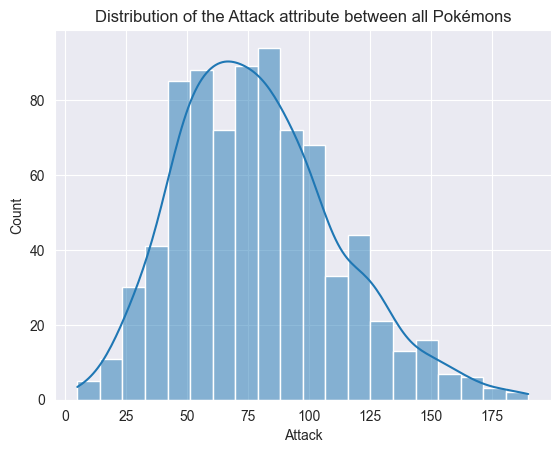

In [159]:
# Plot the histogram of the Attack stat for all Pokémons
# bins=20 sets the number of bars (20)
# kde=true also draws the estimated distribution line along the histogram
ax_hist_atk = sns.histplot(data=df, x="Attack", bins=20, kde=True)
ax_hist_atk.set_title("Distribution of the Attack attribute between all Pokémons");


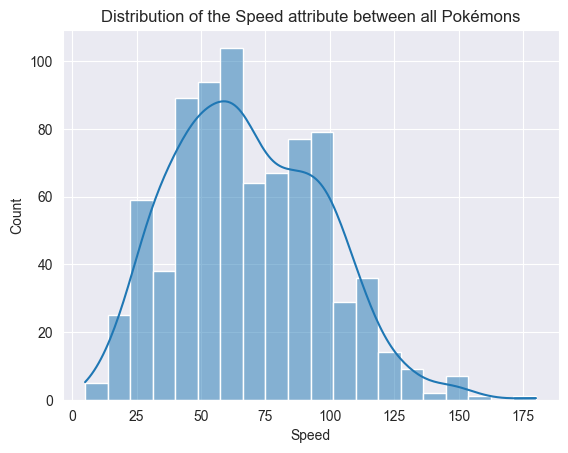

In [160]:
# Plot the histogram of the Speed stat for all Pokémons
ax = sns.histplot(data=df, x="Speed", bins=20, kde=True)
ax.set_title("Distribution of the Speed attribute between all Pokémons");

In [161]:
# Get the 10 primary type categories with most Pokémons
top_types = df["Type1"].value_counts().head(10).index

list(top_types)

['Water',
 'Normal',
 'Grass',
 'Bug',
 'Psychic',
 'Fire',
 'Electric',
 'Rock',
 'Ground',
 'Dragon']

In [162]:
# Filter our data frame to get a new data frame with only the top 10 primary
# type Pokémons
df_toptypes_only = df[df["Type1"].isin(top_types)]

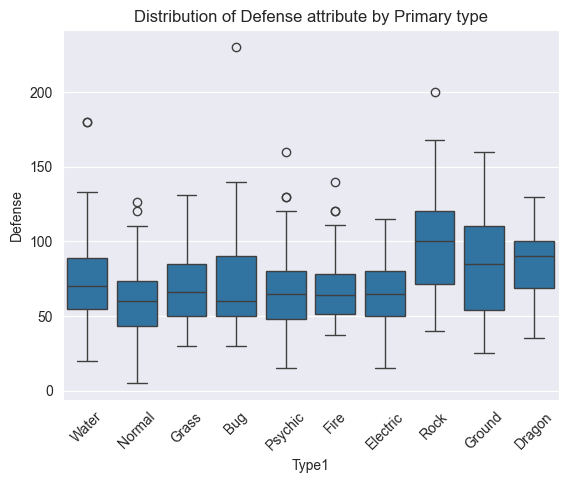

In [163]:
# Show a boxplot for the Defense stat for the top 10 primary types with more
# Pokémons
ax_box_type1 = sns.boxplot(data=df_toptypes_only, x="Type1", y="Defense", order=top_types)
ax_box_type1.tick_params("x", labelrotation=45)
ax_box_type1.set_title("Distribution of Defense attribute by Primary type");

## Homework

In [164]:
# Strongest Pokémon per generation by ’Total’

# First, we get the index labels of each each strongest Pokémon (by Total stat)
# Note the handy .idxmax() function for this purpose
idx_strongpoke = df.groupby("Generation")["Total"].idxmax()

# Now, let's get the generation, name, and respective total of the strongest
# Pokémons. For this, we use the .loc[] property, which accepts row label
# indexes and, optionally, column labels.
df_strongpoke = df.loc[idx_strongpoke, ["Generation", "Name", "Total"]]

# Let's present this table, sorted by generation (note their index on the left)
df_strongpoke.sort_values("Generation")

,Generation,Name,Total
163,1,MewtwoMega Mewtwo X,780
268,2,TyranitarMega Tyranitar,700
426,3,RayquazaMega Rayquaza,780
552,4,Arceus,720
711,5,KyuremBlack Kyurem,700
796,6,DiancieMega Diancie,700


In [165]:
# Top 5 primary types by mean Attack

# We group by Type1, select the Attack column, obtain it's mean (per type1)
# Then we sort values (highest to lowest), get the top 5 with .head(5), and
# round it to two decimal values for presentation purposes
df.groupby("Type1", observed=True)["Attack"].mean().sort_values(ascending=False).head(5).round(2)

Type1
Dragon      112.12
Fighting     96.78
Ground       95.75
Rock         92.86
Steel        92.70
Name: Attack, dtype: float64

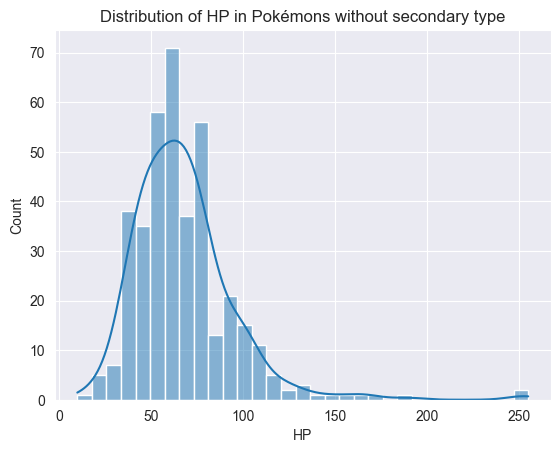

In [166]:
# Histogram of HP attribute in Pokémons with no secondary type (default number
# of bins)
ax = sns.histplot(data=df[df["Type2"] == "None"], x="HP", kde=True)
ax.set_title("Distribution of HP in Pokémons without secondary type");

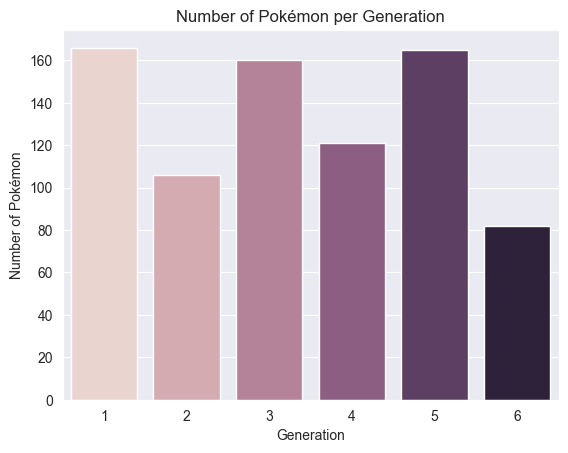

In [167]:
# Count plot of number of Pokémon per generation
# The color of the bars can be associated with a variable with the 'hue' option
# In this case, we opt to set the 'hue' to the generations themselves, so they
# have different colors
ax_count_numpok = sns.countplot(data=df, x="Generation", hue="Generation", legend=False)
ax_count_numpok.set_title("Number of Pokémon per Generation")
ax_count_numpok.set_ylabel("Number of Pokémon");

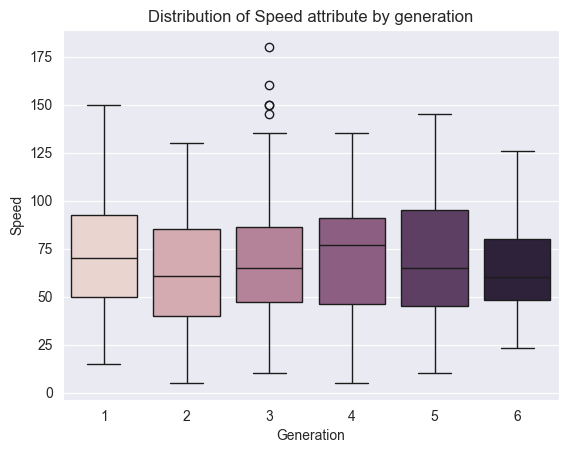

In [168]:
# Box plot of speed attribute by generation (we use the same 'hue' trick)
ax_box_speedgen = sns.boxplot(data=df, x="Generation", y="Speed", hue="Generation", legend=False)
ax_box_speedgen.set_title("Distribution of Speed attribute by generation");

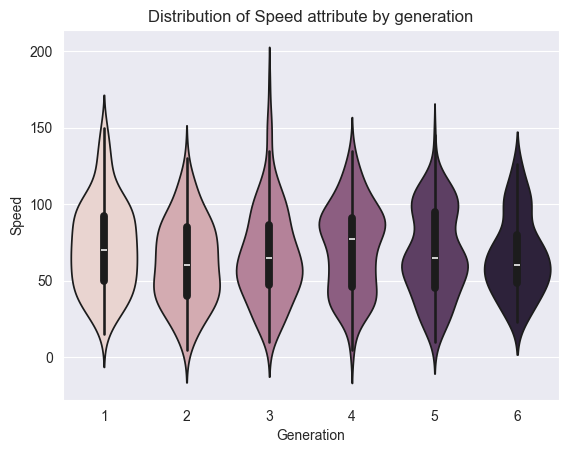

In [169]:
# Violin plot of speed attribute by generation (we use the same 'hue' trick)
ax_box_speedgen = sns.violinplot(data=df, x="Generation", y="Speed", hue="Generation", legend=False)
ax_box_speedgen.set_title("Distribution of Speed attribute by generation");

## Mini-test solution

### Question 1

You are given the ages of 20 people in a community group:

**12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 32, 34, 35, 36, 38**

1. Construct a histogram using the following bin intervals:

* **10-14**
* **15-19**
* **20-24**
* **25-29**
* **30-34**
* **35-39**

2. Count how many values fall into each bin.
3. Draw the respective histogram.

### Solution to Question 2

Here's the frequency table for the histogram:

| Age Interval | Frequency |
| ------------ | --------- |
| 10-14        | 1         |
| 15-19        | 5         |
| 20-24        | 4         |
| 25-29        | 4         |
| 30-34        | 3         |
| 35-39        | 3         |

The code below draws this histogram.

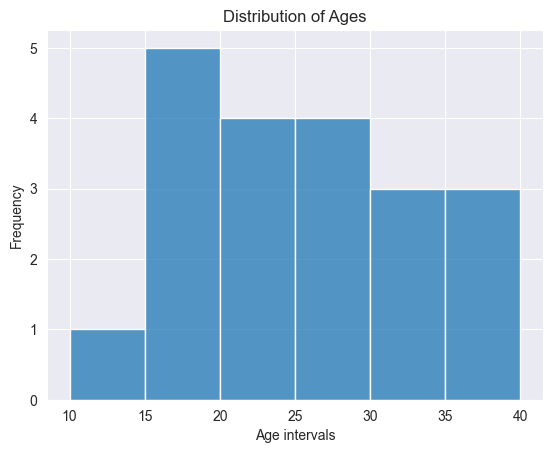

In [170]:
data = [12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 32, 34, 35, 36, 38]
hist_ex = sns.histplot(data=data, bins=[10, 15, 20, 25, 30, 35, 40])
hist_ex.set_title("Distribution of Ages")
hist_ex.set_xlabel("Age intervals")
hist_ex.set_ylabel("Frequency");

### Question 2
 
The following are the ages (in years) of 14 students in a class:

**12, 7, 13, 14, 14, 15, 15, 15, 16, 22, 16, 17, 18, 19**

1. Order the data (if necessary).
2. Find the **minimum**, **first quartile (Q1)**, **median (Q2)**, **third quartile (Q3)**, and **maximum**.
3. Identify any **outliers** (use the 1.5 * IQR rule).
4. Draw a **box plot** showing the data, clearly marking any outliers.

*Note*: IQR is the interquartile range, which corresponds to the distance between the first and third quartiles.

### Solution for Question 2

We're working with the dataset:
**12, 7, 13, 14, 14, 15, 15, 15, 16, 22, 16, 17, 18, 19**

#### Step 1. Order the data

7, 12, 13, 14, 14, 15, 15, 15, 16, 16, 17, 18, 19, 22

#### Step 2. Median (Q2)

There are 14 values (even number), therefore the median is average of 7th and 8th values:

7th = 15, 8th = 15 => Median = (15 + 15) / 2 = **15**

#### Step 3. Quartiles

* **Q1** = median of lower half (first 7 values: 7, 12, 13, 14, 14, 15, 15)
  => Middle = 4th value = **14**

* **Q3** = median of upper half (last 7 values: 15, 16, 16, 17, 18, 19, 22)
  => Middle = 4th value = **17**

* **Note**: There are several ways of obtaining Q1 and Q3, as discussed in this
  [Wikipedia](https://en.wikipedia.org/wiki/Quartile) article. We're using
  method 1 here.

#### Step 4. Five-number summary

* Absolute minimum = 7
* Q1 = 14
* Median = 15
* Q3 = 17
* Absolute maximum = 22

#### Step 5. Interquartile Range (IQR)

IQR = Q3 - Q1 = 17 - 14 = **3**

Outlier thresholds:

* Lower fence = Q1 - 1.5 * IQR = 14 - 4.5 = **9.5**
  * Anything smaller is an outlier: **7**
  * The value immediately above is considered the minimum (the lower whisker limit): **12**
* Upper fence = Q3 + 1.5 * IQR = 17 + 4.5 = **21.5**
  * Anything bigger is an outlier: **22**
  * The value immediately below is considered the maximum (the high whisker limit): **19**

#### Step 6. Identify outliers

* Values below 9.5 => **7** is an outlier.
* Values above 21.5 => **22** is an outlier.

#### Step 7. Draw the boxplot

* Box from 14 (Q1) to 17 (Q3)
* Median line at 15
* Whiskers from 12 to 19 (minimum and maximum, except for outliers)
* Outliers marked separately at 7 and 22

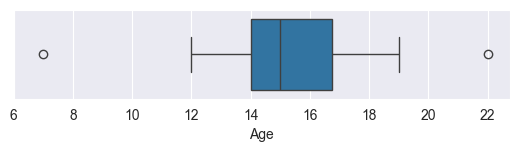

In [ ]:
data = [12, 7, 13, 14, 14, 15, 15, 15, 16, 22, 16, 17, 18, 19]

boxplot_ex = sns.boxplot(data=data, orient="h")
boxplot_ex.set_aspect(3)
boxplot_ex.set_xticks(range(6, 24, 2))
boxplot_ex.set_xlabel("Age");

Note that Seaborn uses [`numpy.percentile`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html)
to calculate the quartiles, which by default assigns a value of 16.75 (and not 17) to Q3.